In [1]:
# 輸入套件和讀取檔案，並計算騎乘距離、時間和速度，轉換星期
import pandas as pd
from geopy.distance import geodesic
df = pd.read_csv('tripdata.csv')
'''
df['start_lat'] = pd.to_numeric(df['start_lat'], errors='coerce')
df['start_lng'] = pd.to_numeric(df['start_lng'], errors='coerce')
df['end_lat'] = pd.to_numeric(df['end_lat'], errors='coerce')
df['end_lng'] = pd.to_numeric(df['end_lng'], errors='coerce')
df['distance_km'] = df.apply(lambda row: geodesic((row['start_lat'], row['start_lng']), (row['end_lat'], row['end_lng'])).kilometers, axis=1)
'''
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['day_of_week'] = df['started_at'].dt.day_name()
df['distance_km'] = pd.to_numeric(df['distance_km'], errors='coerce') #距離的單位為公里
df['time_difference'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60 #時間的單位為分鐘
df['mean_velocity'] = (df['distance_km'] / df['time_difference']) * 60 #速度的單位為每小時幾公里
df

/tmp/ipykernel_92/3755541337.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tripdata.csv')


,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_km,day_of_week,time_difference,mean_velocity
0,0,176B188F3289F37B,classic_bike,2023-05-23 19:22:53,2023-05-23 19:35:23,E 50 St & Park Ave,6659.10,E 74 St & 1 Ave,6953.08,40.757306,-73.974518,40.768974,-73.954823,member,2.108105,Tuesday,12.500000,10.118904
1,1,069987C2DB262187,classic_bike,2023-05-12 18:03:40,2023-05-12 18:06:20,8 Ave & W 24 St,6224.06,W 20 St & 10 Ave,6306.01,40.745911,-73.998071,40.745686,-74.005141,member,0.597628,Friday,2.666667,13.446623
2,2,C3FBB8C73362D212,classic_bike,2023-05-08 00:09:56,2023-05-08 00:12:05,E 9 St & Avenue C,5616.01,Ave C & E 16 St,5769.06,40.725213,-73.977688,40.729848,-73.974552,member,0.578886,Monday,2.150000,16.154965
3,3,EE7D480BA71D9A84,classic_bike,2023-05-18 11:01:33,2023-05-18 11:03:59,E 9 St & Avenue C,5616.01,Ave C & E 16 St,5769.06,40.725213,-73.977688,40.729848,-73.974552,member,0.578886,Thursday,2.433333,14.273907
4,4,A303930EFAAA0441,docked_bike,2023-05-24 16:45:33,2023-05-24 16:59:19,E 47 St & 1 Ave,6498.09,St Marks Pl & 2 Ave,5669.10,40.752069,-73.967844,40.728419,-73.987140,casual,3.090927,Wednesday,13.766667,13.471351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196172,2196172,1436418CABC4E6A6,classic_bike,2023-05-30 17:25:08,2023-05-30 17:32:07,E 58 St & Madison Ave,6839.04,3 Ave & E 72 St,7028.04,40.763026,-73.972095,40.769943,-73.960607,member,1.237249,Tuesday,6.983333,10.630298
2196173,2196173,521A0EA1F08496CD,classic_bike,2023-05-12 17:04:42,2023-05-12 17:19:27,W 25 St & 9 Ave,6339.06,W 50 St & 9 Ave,6854.05,40.747833,-74.000572,40.763605,-73.989180,member,1.998304,Friday,14.750000,8.128694
2196174,2196174,4238C665C992468A,classic_bike,2023-05-30 15:25:28,2023-05-30 15:42:54,W 25 St & 9 Ave,6339.06,Ave A & E 14 St,5779.11,40.747833,-74.000572,40.730311,-73.980472,member,2.582371,Tuesday,17.433333,8.887702
2196175,2196175,2968C17CC49A7187,classic_bike,2023-05-27 19:55:19,2023-05-27 20:00:41,W 55 St & 6 Ave,6809.09,W 50 St & 9 Ave,6854.05,40.763189,-73.978434,40.763605,-73.989180,member,0.908480,Saturday,5.366667,10.156922


In [3]:
# 騎乘距離、時間和速度的敘述統計
columns = ['distance_km', 'time_difference', 'mean_velocity']
statistics = df[columns].describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
statistics

,distance_km,time_difference,mean_velocity
count,2196177.000,2196177.000,2196177.000
mean,1.787,13.760,9.545
std,1.569,26.100,4.243
min,0.000,0.517,0.000
25%,0.761,5.283,7.195
50%,1.364,9.283,9.563
75%,2.308,16.150,12.000
max,20.770,1499.483,657.928


In [8]:
# 會員非會員、腳踏車類型的交叉表
cross_tab = pd.crosstab(df['rideable_type'], df['member_casual'], margins=True, margins_name='Total')
cross_tab['member_rate'] = cross_tab['member'] / cross_tab['Total']
cross_tab
# 只有非會員有docked bike，會員使用電動車的比例略少於使用經典車的比例

member_casual,casual,member,Total,member_rate
rideable_type,,,,
classic_bike,340689,1581236,1921925,0.823
docked_bike,10939,0,10939,0.000
electric_bike,51543,211770,263313,0.804
Total,403171,1793006,2196177,0.816


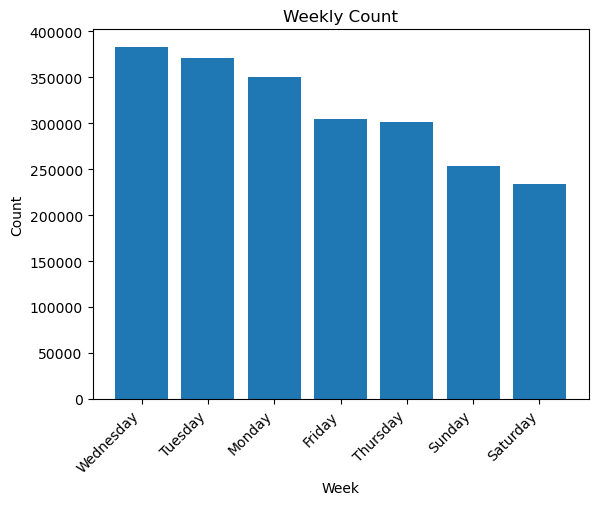

In [12]:
# 一週中借用次數的長條圖
import matplotlib.pyplot as plt
weekly_count = df.groupby(df['day_of_week']).size()
weekly_count = weekly_count.sort_values(ascending=False)
plt.bar(weekly_count.index, weekly_count)
plt.title('Weekly Count')
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
# 平日的借用次數多於週末

member_casual  casual  member  member rate
day_of_week                               
Monday          61902  288630    82.340557
Tuesday         51053  319379    86.217983
Wednesday       52919  329963    86.178770
Thursday        44139  256613    85.323788
Friday          56566  247999    81.427282
Saturday        63583  170303    72.814534
Sunday          73009  180119    71.157280


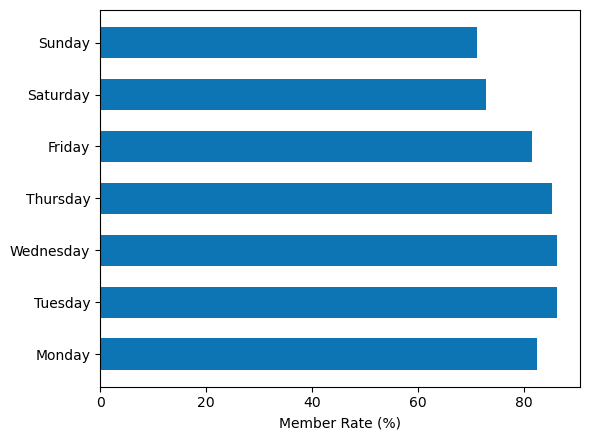

In [3]:
import matplotlib.pyplot as plt
# 一週中會員、非會員的借用數量
weekly_member_count = df.groupby([df['day_of_week'], 'member_casual']).size().unstack()
weekly_member_count['member rate'] = weekly_member_count['member'] / (weekly_member_count['member'] + weekly_member_count['casual'])*100
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_member_count = weekly_member_count.reindex(days_order)
print(weekly_member_count)
# 繪製橫條圖
fig, ax = plt.subplots(figsize=(6, 4.5))
bar_width = 0.6
ax.barh(weekly_member_count.index,weekly_member_count['member rate'] , color='#0d75b3', height=bar_width)
ax.set_xlabel('Member Rate (%)')
plt.tight_layout()
plt.show()
# 平日會員借用的比例多於週末（會員：平日 > 週末、非會員：週末 > 平日）

In [5]:
# 一週中不同腳踏車類型的借用數量
weekly_bike_count = df.groupby([df['day_of_week'], 'rideable_type']).size().unstack()
weekly_bike_count['classic rate'] = weekly_bike_count['classic_bike'] / (weekly_bike_count['electric_bike']+weekly_bike_count['classic_bike'])
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_bike_count = weekly_bike_count.reindex(days_order)
weekly_bike_count
#週三借用電動車的比例最低，週四借用電動車的比例最高

rideable_type,classic_bike,docked_bike,electric_bike,classic rate
day_of_week,,,,
Monday,305893,1937,42702,0.877503
Tuesday,327185,1411,41836,0.886630
Wednesday,339684,1259,41939,0.890104
Thursday,259715,975,40062,0.866361
Friday,262686,1446,40433,0.866610
Saturday,203858,1721,28307,0.878074
Sunday,222904,2190,28034,0.888283


started_at
0      23113
1      14431
2       9011
3       5697
4       5166
5      15461
6      44630
7      87846
8     132638
9     112180
10     95940
11    106152
12    121039
13    130351
14    142933
15    157164
16    174694
17    217216
18    198144
19    143256
20     98314
21     68215
22     54183
23     38403
dtype: int64


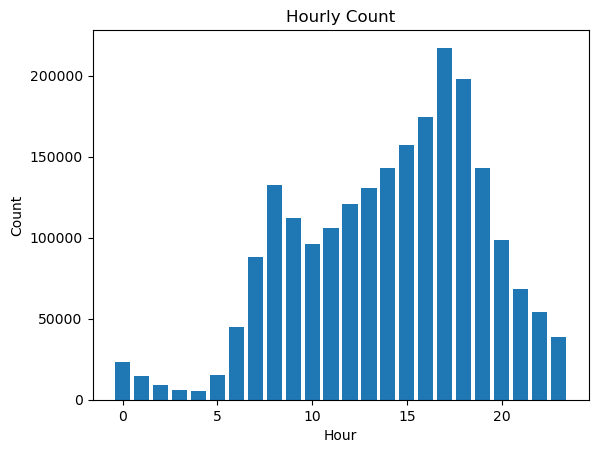

In [14]:
# 每小時的借用數量
hourly_count = df.groupby(df['started_at'].dt.hour).size()
print(hourly_count)
plt.bar(hourly_count.index, hourly_count)
plt.title('Hourly Count')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()
#一日中最頻繁借用的時段為下班時間，最少借用的時段為凌晨時間

member_casual  casual  member  member rate   total
started_at                                        
0                5310   17803    77.025916   23113
1                3501   10930    75.739727   14431
2                2234    6777    75.208079    9011
3                1358    4339    76.162893    5697
4                 962    4204    81.378242    5166
5                1390   14071    91.009637   15461
6                3756   40874    91.584136   44630
7                6662   81184    92.416274   87846
8               12152  120486    90.838221  132638
9               14531   97649    87.046711  112180
10              18227   77713    81.001668   95940
11              23272   82880    78.076720  106152
12              27200   93839    77.527904  121039
13              29454  100897    77.404086  130351
14              33011  109922    76.904564  142933
15              35339  121825    77.514571  157164
16              35664  139030    79.584874  174694
17              38701  178515  

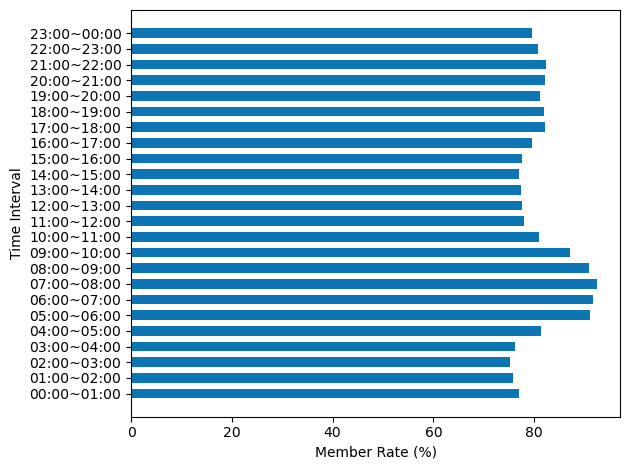

In [5]:
# 每小時會員和非會員的借用數量
hourly_member_count = df.groupby([df['started_at'].dt.hour, 'member_casual']).size().unstack()
hourly_member_count['member rate'] = hourly_member_count['member'] / (hourly_member_count['member']+hourly_member_count['casual'])*100
hourly_member_count['total'] = hourly_member_count['member'] + hourly_member_count['casual']
print(hourly_member_count)
# 繪製橫條圖
fig, ax = plt.subplots()
bar_width = 0.6
ax.barh(hourly_member_count.index,hourly_member_count['member rate'] , color='#0d75b3', height=bar_width)
ax.set_yticks(hourly_member_count.index)
ax.set_yticklabels([f'{hour:02d}:00~{((hour+1)%24):02d}:00' for hour in hourly_member_count.index])
ax.set_ylabel('Time Interval')
ax.set_xlabel('Member Rate (%)')
plt.tight_layout()
plt.show()
#早上時會員借用的比例高，下午和凌晨時借用的比例低

In [21]:
# 每小時不同類型腳踏車的借用數量
hourly_bike_count = df.groupby([df['started_at'].dt.hour, 'rideable_type']).size().unstack()
hourly_bike_count['classic/electric rate'] = hourly_bike_count['classic_bike'] / hourly_bike_count['electric_bike']
hourly_bike_count
# 早上借用經典腳踏車的數量多於其他時段

rideable_type,classic_bike,docked_bike,electric_bike,classic/electric rate
started_at,,,,
0,19694,56,3363,5.856081
1,12335,30,2066,5.970474
2,7657,21,1333,5.744186
3,4853,18,826,5.875303
4,4370,22,774,5.645995
5,13202,12,2247,5.875389
6,38661,26,5943,6.505300
7,77590,103,10153,7.642076
8,119638,269,12731,9.397376


Text(0, 0.5, 'Day')

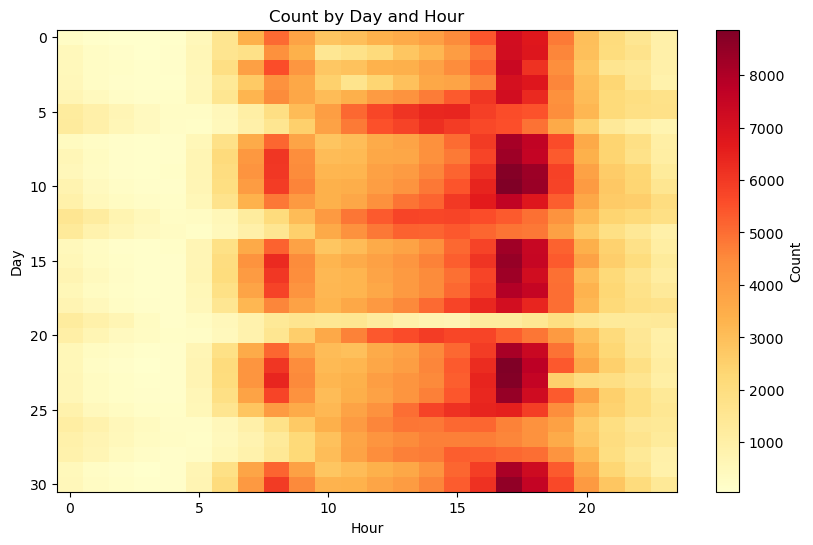

In [12]:
# 5月每日每小時借用數量的熱力圖
day_hour_count = pd.pivot_table(df, index=df['started_at'].dt.day, columns=df['started_at'].dt.hour, aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
plt.imshow(day_hour_count, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Count')
plt.title('Count by Day and Hour')
plt.xlabel('Hour')
plt.ylabel('Day')

Text(0, 0.5, 'Day')

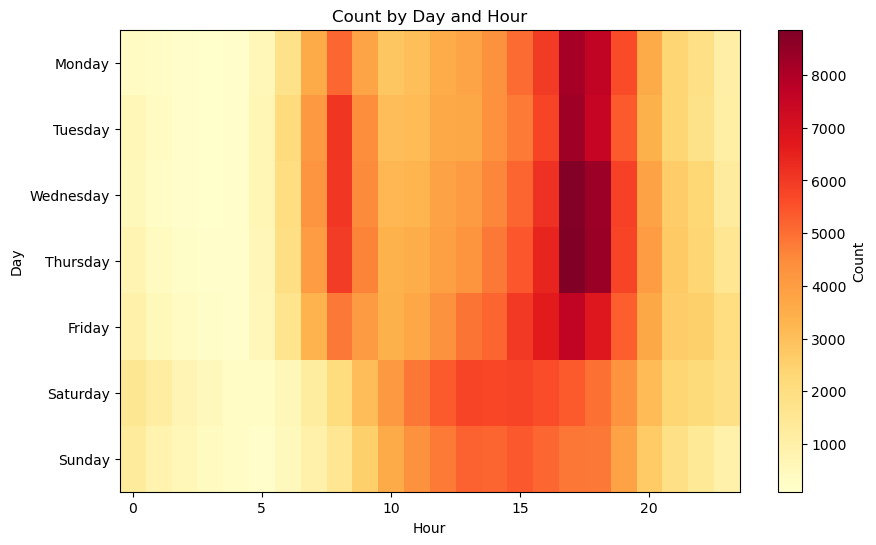

In [93]:
# 抽樣一週中每天每小時借用數量的熱力圖
sample_days = [8, 9, 10, 11, 12, 13, 14]
sample_day = df[df['started_at'].dt.day.isin(sample_days)]
day_hour_count = pd.pivot_table(df, index=sample_day['started_at'].dt.day, columns=sample_day['started_at'].dt.hour, aggfunc='size', fill_value=0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
plt.imshow(day_hour_count, cmap='YlOrRd', aspect='auto')
plt.yticks(range(len(day_order)), day_order)
plt.colorbar(label='Count')
plt.title('Count by Day and Hour')
plt.xlabel('Hour')
plt.ylabel('Day')
# 平日的借用時間集中於上下班時間，週末則平均於下午的時段

In [31]:
# 會員和非會員的騎乘距離
distance_member = df.groupby('member_casual')['distance_km'].describe()
distance_member
#非會員騎乘的距離多於會員

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,403171.0,2.093158,1.709315,0.0,0.997395,1.651889,2.709174,20.769826
member,1793006.0,1.718264,1.527183,0.0,0.721495,1.302291,2.215032,20.769826


In [35]:
# 會員和非會員的騎乘時間
time_member = df.groupby('member_casual')['time_difference'].describe()
time_member
# 非會員的借用時間較長

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,403171.0,23.176689,40.049354,0.516667,8.783333,15.3,26.766667,1499.483333
member,1793006.0,11.643040,21.196671,0.516667,4.833333,8.4,14.166667,1498.900000


In [37]:
# 會員和非會員的騎乘速度
velocity_member = df.groupby('member_casual')['mean_velocity'].describe()
velocity_member
# 會員的平均速度較快

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,403171.0,7.557775,4.342094,0.0,4.727363,7.587421,10.218879,586.134285
member,1793006.0,9.991506,4.089346,0.0,7.732913,9.922529,12.300711,657.928033
